# Stochastic, Mini-Batch, Batch Gradient Descent
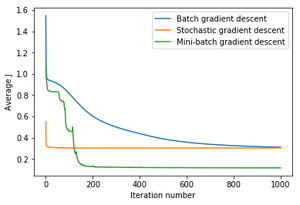

#### _Tổng quan_

##### 1) (Full) batch gradient descent: đưa toàn bộ X và Y vào để train:

Với cách 1, do đưa toàn bộ batch vào nên gradient ở mỗi vòng lặp ổn định. Cách này được khuyến khích sử dụng khi hàm cost của mình biết rõ là convex (không có nhiều hơn 1 điểm tối ưu cục bộ). Tuy nhiên, đối với những hàm phức tạp, thì cách 1 có thể ko bao giờ đạt tối ưu toàn cục được.

##### 2) Stochastic gradient descent: đưa từng cặp (x, y) trong data X, Y vào để train :

Đối với cách 2, do mình đưa vào từng cặp nên gradient ở mỗi vòng lặp sẽ rất nhiễu (noisy). Chính vì sự nhiễu này mà có trong qúa trình học, nó có thể giúp mô hình vượt qua được các điểm tối ưu cục bộ. Stochastic = random, thể hiện cho sự nhiễu.
##### 3) Mini-batch gradient descent: bốc 1 lượng nhiều hơn 1 mẫu từ X, Y để train.

Cách 3 là sự kết hợp giữa 1 và 2, cũng là cách dùng nhiều nhất trong deep learning. Trong các bài tới sẽ đề cập sau.



_Các ví dụ trong bài sẽ xoay quang việc giải quyết bài toán dự báo giá nhà._

In [30]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

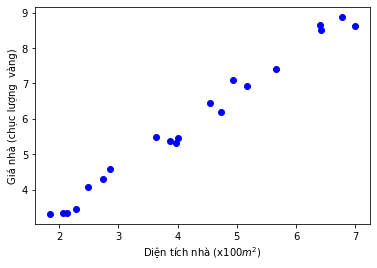

In [31]:
#doc va xu ly data
data = genfromtxt('my_house_price_prediction.csv', delimiter=',')

X = data[:,0]
y = data[:,1:]
X_train = np.c_[np.ones((X.shape[0],1)), X]

m, n = X_train.shape

plt.plot(X, y, 'bo')
plt.xlabel('Diện tích nhà (x100$m^2$)')
plt.ylabel('Giá nhà (chục lượng  vàng)')
plt.show()

epoches = 50
learning_rate = 0.01

### 1. Stochastic Gradient Descent (SGD)

Huấn luyện mô hình linear regression theo SGD dùng từng mẫu dữ liệu để cập nhật bộ tham số. Công thức cho các bước trong linear regression theo SGD như sau.

- Tính feed forward

$$ h_\theta(x) = \theta_0x_0 + \theta_1x_1 + ... + \theta_nx_n $$
 

- Tính loss

$$ J(x,y;\theta) = (h_\theta(x)–y)^2$$
 

- Tính đạo hàm cho từng tham số

$$ \frac {\partial J(x,y;\theta)}{\partial \theta_j} = 2(h_\theta(x)–y)x_j$$
 

- Cập nhật tham số

$$ \theta_j=\theta_j – \alpha \frac{\partial J(x,y;\theta)}{\partial \theta_j}$$


Áp dụng cho bài toán dự đoán giá nhà: 

In [26]:
def stochastic_gradient_descent():
   
    #Initializing parameter
    thetas = np.random.randn(n,1)
    
    thetas_path = [thetas]
    losses = []
    
    for epoch in range(epoches):
        for i in range(m):
            #put a randomaly sample:
            random_index = np.random.randint(m)
            x_i = X_train[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            
            #compute y_hat = theta*X
            y_hat = np.dot(x_i, thetas)
            
            #compute loss_i
            loss_i = (y_hat - y_i)**2
            
            #comput gradient of loss_i
            grd_loss_i = 2*(y_hat - y_i)
            
            #compute gradient
            gradients = np.dot(x_i.T,grd_loss_i)
            
            #update value of theta
            thetas = thetas - learning_rate*gradients
            
            #logging
            thetas_path.append(thetas)
            losses.append(loss_i[0][0])
            
    return thetas_path, losses
            

1000


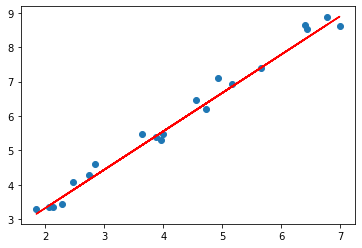

In [24]:
bgd_thetas, losses = stochastic_gradient_descent()

print(len(losses))

plt.scatter(X,y)
data_y = X*bgd_thetas[-1][1] + bgd_thetas[-1][0]
plt.plot(X, data_y, color='r')
plt.show()

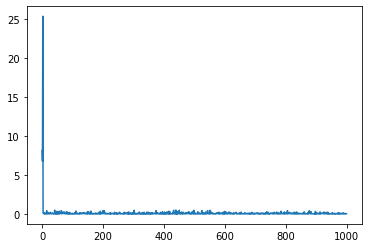

In [25]:
#plot 200 first value of loss value 
plt.plot(losses[:])

### 3. Batch Gradient Descent (BGD)

– Tính feed-forward cho mẫu thứ ith trong bộ dữ liệu

$$h_\theta(x(^{(i)})=\theta_0x^{(i)}_0 +\theta_1x^{(i)}_1 + ... +\theta_nx^{(i)}_n$$
– Tính giá trị loss trung bình cho m mẫu dữ liệu

$$ \displaystyle J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
– Tính đạo hàm cho từng tham số

$$  \frac{\partial J(\theta)}{\partial \theta_j}= \frac{2}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
– Cập nhật tham số

$$\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

trong đó $\alpha$ là learning rate  và là giá trị được xác định trước.

In [35]:
def batch_gradient_descent():
    
    #Initializing parameter
    thetas = np.random.randn(n,1)
    
    thetas_path = [thetas]
    losses = []
    
    for i in range(epoches):
        y_hat = np.dot(X_train, thetas)
        
        loss = (y_hat - y)**2
        
        loss_grd = 2*(y_hat - y)/m
        
        gradients = np.dot(X_train.T, loss_grd)
        
        thetas = thetas - learning_rate*gradients
        thetas_path.append(thetas)
        
        mean_loss = np.sum(loss)/m
        losses.append(mean_loss)
        
    return thetas_path, losses

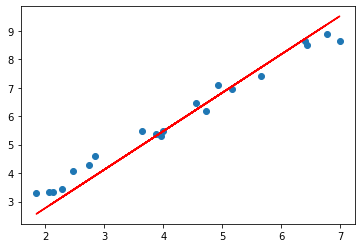

In [36]:
bgd_thetas, losses = batch_gradient_descent()

plt.scatter(X, y)
data_y = X*bgd_thetas[-1][1]+ bgd_thetas[-1][0]
plt.plot(X,data_y, color="r")
plt.show()

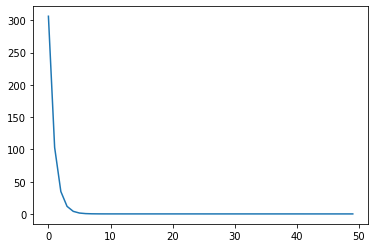

In [37]:
plt.plot(losses[:])

### 3. Mini-Batch Gradient Descent (MBGD)

MBGD dùng một số mẫu để huấn luyện mô hình. Gọi bs là số lượng mẫu được dùng cho một lần cập nhật tham số, các bước tính cho việc huấn luyện mô hình theo MBGD  như sau

– Tính feed-forward cho mẫu thứ ith trong bộ dữ liệu

$$h_\theta(x(^{(i)})=\theta_0x^{(i)}_0 +\theta_1x^{(i)}_1 + ... +\theta_nx^{(i)}_n$$
– Tính giá trị loss trung bình cho bs mẫu dữ liệu

$$ \displaystyle J(\theta) = \frac{1}{bs}\sum_{i=1}^{bs}(h_\theta(x^{(i)}) - y^{(i)})^2$$
– Tính đạo hàm cho từng tham số

$$  \frac{\partial J(\theta)}{\partial \theta_j}= \frac{2}{bs}\sum_{i=1}^{bs}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} $$
– Cập nhật tham số

$$\theta_j = \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

trong đó $\alpha$ là learning rate  và là giá trị được xác định trước.

In [45]:
def mini_batch_gradient_descent():
    minibatch_size = 5
    
    thetas = np.random.randn(n, 1)
    thetas_path = [thetas]    
    losses = []
    
    for i in range(epoches):
        shuffled_indices = np.random.permutation(m)
        X_train_shuffled = X_train[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, m, minibatch_size):
            x_i = X_train_shuffled[i:i+minibatch_size]
            y_i = y_shuffled[i:i+minibatch_size]
            
            y_hat = np.dot(x_i, thetas)
            
            loss = (y_hat - y_i)**2
            
            loss_grd = 2*(y_hat - y_i)/minibatch_size
            
            gradients = np.dot(x_i.T, loss_grd)
            
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)
            
        return thetas_path, losses           

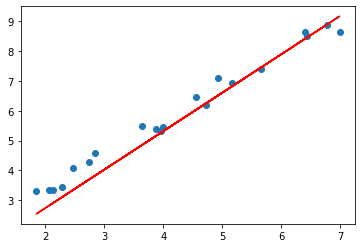

In [64]:
mbgd_thetas, losses = mini_batch_gradient_descent()

plt.scatter(X,y)
data_y = X*mbgd_thetas[-1][1]  + mbgd_thetas[-1][0]
plt.plot(X, data_y, color='r')
plt.show()

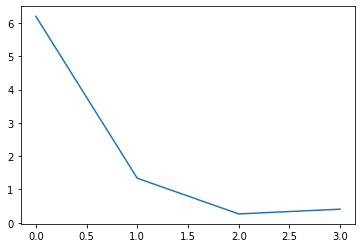

In [65]:
plt.plot(losses[:])